# European Environment Agency (EEA) Air Quality Data

```{hint} 
<a href='https://dust.ltpy.adamplatform.eu/hub/user-redirect/lab/tree/01_observations/2_ground-based/23_EEA_Air_Quality.ipynb' target='_blank'>Execute the notebook on the training platform >></a>
```

The European Environment Agency (EEA) has a network of air quality monitoring stations across Europe. These stations record data for a number of pollutants, e.g. Particulate Matter 2.5 and Particulate Matter 10, and are placed in different environments to capture what is happening across both urban and rural areas. To learn more about the stations and look up station codes, explore the <a href='https://www.eea.europa.eu/themes/air/air-quality-index/index' target='_blank'>European Air Quality Index map</a>.

In the air quality directive (2008/EC/50), the EU has set two limit values for particulate matter (PM10) for the protection of human health: the PM10 daily mean value may not exceed 50 micrograms per cubic metre (µg/m3) more than 35 times in a year and the PM10 annual mean value may not exceed 40 micrograms per cubic metre (µg/m3). <a href='https://www.eea.europa.eu/data-and-maps/figures/particulate-matter-pm10-annual-limit-value-for-the-protection-of-human-health-3' target='_blank'>(Source)</a>

As for PM2.5, no daily limit has been set by the EU, but the World Health Organisation's daily limit is 25 micrograms per cubic metre (µg/m3). Read more <a href='https://www.eea.europa.eu/themes/air/air-quality-concentrations/air-quality-standards' target='_blank'>here</a>.

```{admonition} Basic facts
**Spatial coverage**: `Observation stations across Europe` <br>
**Temporal resolution**: `daily aggregates` <br>
**Data format**: `csv`
```

```{admonition} How to access the data
The EEA air quality data is available for download via the <a href='https://discomap.eea.europa.eu/map/fme/AirQualityExport.htm' target='_blank'>EEA Air Quality Portal</a>.
The Python library `airbase` allows you to download all EEA Air Quality data for a country at once. You can specify which pollutant, country and time period you want to download. Read more about the library <a href='https://airbase.readthedocs.io/en/latest/' target='_blank'>here</a>.

The first part of this notebook (1 - Download EEA Air Quality data for specific pollutants and countries) shows you how to request EEA Air Quality data with the library `airbase`.
```

<hr>

**Load required libraries**

In [2]:
import numpy as np
import pandas as pd
import airbase

import matplotlib.pyplot as plt

<hr>

## *Optional: Download EEA Air Quality data for specific pollutants and countries*

The Python library `airbase` allows you to download all EEA Air Quality data for a country at once. You can specify which pollutant, country and time period you want to download. Read more about the library [here](https://airbase.readthedocs.io/en/latest/). Due to the large file sizes, it is recommended to download data for each country and pollutant (PM10 and PM2.5) separately. We have predownloaded data for the station Palma de Mallorca, Spain for you.

The first step is to store the `airbase` client in a variable called `client`.

In [2]:
client = airbase.AirbaseClient()

Next, we define a download request by stating which country, pollutant and year we want the data from. The abbreviation for Spain is `"ES"` and the pollutant is `"PM10"`. We only want data from `2024`, so we specify both, the `year_from` and `year_to` as `2024`. 

By using the function `download_to_file()`, all the 490 resulting CSVs are concatenated into a single CSV file called `ES_PM10_2024.csv`. Each CSV contains data from a single station. It is recommended to download all the data for a country into one CSV to make it easier to search for a station using the station code. You are able to change the file name to anything you wish. We also specify where the data should be stored by stating the file path `"../../eodata/2_observations/eea/ES/ES_PM10_2024.csv"`. 

We have commented out the code as these data have already been downloaded for you.

In [ ]:
#r = client.request(country=["ES"], pl=["PM10"], year_from=2024, year_to=2024)
#r.download_to_file("../../eodata/2_observations/eea/ES/ES_PM10_2024.csv")

Next, we download the PM2.5 data for Spain and store it in a CSV called `ES_PM2pt5_2024.csv`. You will notice that there are fewer stations that collect PM2.5 data, just 226.

In [ ]:
#r = client.request(country=["ES"], pl=["PM2.5"], year_from=2024, year_to=2024)
#r.download_to_file("../../eodata/2_observations/eea/ES/ES_PM10_2024.csv")

## Read the observation data with pandas

For this exercise, we will focus on the Palma de Mallorca Station, Spain.

The EEA air quality station in Palma de Mallorca has the code `ES2097A`. You can find the file in the folder `../../eodata/2_observations/eea/ES/palma/`. You can read `csv` files with the function `read_table()` from the Python library `pandas`. We can set additonal keyword arguments that allow us to specify the columns and rows of interest:
* `delimiter`: specify the delimiter in the text file, e.g. comma
* `header`: specify the index of the row that shall be set as header.
* `index_col`: specify the index of the column that shall be set as index
* `low_memory`: this is set to `False` in this case to avoid mixed type interference

Because the data is stored in a comma-separated values file, the delimiter is set to `,`. The first row of the file contains the header information, thus we set the header value to `[0]`. Finally, we set the index column to be the 5th column in the file, which is the `AirQualityStationEoICode`.

You see below that the resulting dataframe has 3601 rows and 16 columns.

In [3]:
df = pd.read_table('../../eodata/2_observations/eea/ES/palma/ES_5_68795_2024_timeseries.csv', delimiter=',', header=[0], index_col=4, low_memory=False)
df

Countrycode    Namespace AirQualityNetwork  \
AirQualityStationEoICode                                              
ES2097A                           ES  ES.BDCA.AQD        NET_ES205A   
ES2097A                           ES  ES.BDCA.AQD        NET_ES205A   
ES2097A                           ES  ES.BDCA.AQD        NET_ES205A   
ES2097A                           ES  ES.BDCA.AQD        NET_ES205A   
ES2097A                           ES  ES.BDCA.AQD        NET_ES205A   
...                              ...          ...               ...   
ES2097A                           ES  ES.BDCA.AQD        NET_ES205A   
ES2097A                           ES  ES.BDCA.AQD        NET_ES205A   
ES2097A                           ES  ES.BDCA.AQD        NET_ES205A   
ES2097A                           ES  ES.BDCA.AQD        NET_ES205A   
ES2097A                           ES  ES.BDCA.AQD        NET_ES205A   

                         AirQualityStation      SamplingPoint  \
AirQualityStationEoICode                                        
ES2097A                        STA_ES2097A  SP_35016014_10_49   
ES2097A                        STA_ES2097A  SP_35016014_10_49   
ES2097A                        STA_ES2097A  SP_35016014_10_49   
ES2097A                        STA_ES2097A  SP_35016014_10_49   
ES2097A                        STA_ES2097A  SP_35016014_10_49   
...                                    ...                ...   
ES2097A                        STA_ES2097A  SP_35016014_10_49   
ES2097A                        STA_ES2097A  SP_35016014_10_49   
ES2097A                        STA_ES2097A  SP_35016014_10_49   
ES2097A                        STA_ES2097A  SP_35016014_10_49   
ES2097A                        STA_ES2097A  SP_35016014_10_49   

                               SamplingProcess              Sample  \
AirQualityStationEoICode                                             
ES2097A                   SPP_35016014_10_49.1  SAM_35016014_10_49   
ES2097A                   SPP_35016014_10_49.1  SAM_35016014_10_49   
ES2097A                   SPP_35016014_10_49.1  SAM_35016014_10_49   
ES2097A                   SPP_35016014_10_49.1  SAM_35016014_10_49   
ES2097A                   SPP_35016014_10_49.1  SAM_35016014_10_49   
...                                        ...                 ...   
ES2097A                   SPP_35016014_10_49.1  SAM_35016014_10_49   
ES2097A                   SPP_35016014_10_49.1  SAM_35016014_10_49   
ES2097A                   SPP_35016014_10_49.1  SAM_35016014_10_49   
ES2097A                   SPP_35016014_10_49.1  SAM_35016014_10_49   
ES2097A                   SPP_35016014_10_49.1  SAM_35016014_10_49   

                         AirPollutant  \
AirQualityStationEoICode                
ES2097A                          PM10   
ES2097A                          PM10   
ES2097A                          PM10   
ES2097A                          PM10   
ES2097A                          PM10   
...                               ...   
ES2097A                          PM10   
ES2097A                          PM10   
ES2097A                          PM10   
ES2097A                          PM10   
ES2097A                          PM10   

                                                           AirPollutantCode  \
AirQualityStationEoICode                                                      
ES2097A                   http://dd.eionet.europa.eu/vocabulary/aq/pollu...   
ES2097A                   http://dd.eionet.europa.eu/vocabulary/aq/pollu...   
ES2097A                   http://dd.eionet.europa.eu/vocabulary/aq/pollu...   
ES2097A                   http://dd.eionet.europa.eu/vocabulary/aq/pollu...   
ES2097A                   http://dd.eionet.europa.eu/vocabulary/aq/pollu...   
...                                                                     ...   
ES2097A                   http://dd.eionet.europa.eu/vocabulary/aq/pollu...   
ES2097A                   http://dd.eionet.europa.eu/vocabulary/aq/pollu...   
ES2097A             

Then, we select only columns that contain data of interest, the `Concentration` of PM10 and `DatetimeBegin`, and reorder them so that `DatetimeBegin` is the first column.

In [4]:
# select columns by name
df = df.filter(items=['Concentration','DatetimeBegin'])

# Reset DataFrame with columns in desired order
df = df[['DatetimeBegin','Concentration']]
df

DatetimeBegin  Concentration
AirQualityStationEoICode                                           
ES2097A                   2024-01-01 01:00:00 +01:00           32.0
ES2097A                   2024-01-01 02:00:00 +01:00           42.0
ES2097A                   2024-01-01 04:00:00 +01:00           30.0
ES2097A                   2024-01-01 06:00:00 +01:00           25.0
ES2097A                   2024-01-01 07:00:00 +01:00           24.0
...                                              ...            ...
ES2097A                   2024-05-29 13:00:00 +01:00            NaN
ES2097A                   2024-05-29 14:00:00 +01:00            NaN
ES2097A                   2024-05-29 21:00:00 +01:00           16.0
ES2097A                   2024-05-29 22:00:00 +01:00           14.0
ES2097A                   2024-05-29 23:00:00 +01:00            NaN

[3601 rows x 2 columns]

Now, let us change the index column to the start time column `DatetimeBegin` by using `set_index()`. Then we will resample the hourly data into daily data using `.resample()`, passing in `D` for day, and `.mean()` to calculate the mean. 

Finally, in order to differentiate the data later on, we rename the column from `Concentration` to `PM10`.

In [5]:
# Set date column as index 
df = df.set_index('DatetimeBegin')

# Converting the Index to a DatetimeIndex
df.index = pd.to_datetime(df.index)

# Resample hourly data to daily mean of PM10
pm10_daily = df.resample('D').mean()

# Rename Concentration column
pm10_daily.rename(columns={'Concentration': 'PM10'}, inplace=True)
pm10_daily


PM10
DatetimeBegin                       
2024-01-01 00:00:00+01:00  31.666667
2024-01-02 00:00:00+01:00  25.333333
2024-01-03 00:00:00+01:00  21.208333
2024-01-04 00:00:00+01:00  15.833333
2024-01-05 00:00:00+01:00   3.708333
...                              ...
2024-05-26 00:00:00+01:00  12.166667
2024-05-27 00:00:00+01:00  13.833333
2024-05-28 00:00:00+01:00  16.541667
2024-05-29 00:00:00+01:00  15.647059
2024-05-30 00:00:00+01:00        NaN

[151 rows x 1 columns]

Now, let us repeat all the above steps for the PM2.5 data for the same station.

In [6]:
df2 = pd.read_table('../../eodata/2_observations/eea/ES/palma/ES_6001_68800_2024_timeseries.csv', delimiter=',', header=[0], index_col=4, low_memory=False)

# select columns by name
df2 = df2.filter(items=['Concentration','DatetimeBegin'])

# Reset DataFrame with columns in desired order
df2 = df2[['DatetimeBegin','Concentration']]

# Set date column as index 
df2 = df2.set_index('DatetimeBegin')

# Converting the Index to a DatetimeIndex
df2.index = pd.to_datetime(df2.index)

# Resample hourly data to daily mean of PM2.5
pm2pt5_daily = df2.resample('D').mean()

# Rename Concentration column
pm2pt5_daily.rename(columns={'Concentration': 'PM2.5'}, inplace=True)
pm2pt5_daily

PM2.5
DatetimeBegin                       
2024-01-01 00:00:00+01:00  12.125000
2024-01-02 00:00:00+01:00   8.833333
2024-01-03 00:00:00+01:00   7.875000
2024-01-04 00:00:00+01:00   6.041667
2024-01-05 00:00:00+01:00   1.833333
...                              ...
2024-05-26 00:00:00+01:00   7.208333
2024-05-27 00:00:00+01:00   6.750000
2024-05-28 00:00:00+01:00   8.083333
2024-05-29 00:00:00+01:00   7.352941
2024-05-30 00:00:00+01:00        NaN

[151 rows x 1 columns]

Because we are interested in plotting only data for April 2024, we have to filter both data frames further. Using `.index.to_series()` enables us to turn the `DatetimeIndex` into a series. We then can pass the start date of `2024-04-01` and the end date of `2024-04-28` to the `.between()` method to filter this series to only April 2024.

In [7]:
pm10_Apr2024 = pm10_daily[pm10_daily.index.to_series().between('2024-04-01', '2024-04-30')]
pm10_Apr2024

PM10
DatetimeBegin                        
2024-04-01 00:00:00+01:00   16.304348
2024-04-02 00:00:00+01:00    9.041667
2024-04-03 00:00:00+01:00    8.043478
2024-04-04 00:00:00+01:00    7.636364
2024-04-05 00:00:00+01:00   12.166667
2024-04-06 00:00:00+01:00   11.458333
2024-04-07 00:00:00+01:00   16.000000
2024-04-08 00:00:00+01:00   14.125000
2024-04-09 00:00:00+01:00   25.625000
2024-04-10 00:00:00+01:00   46.291667
2024-04-11 00:00:00+01:00   92.083333
2024-04-12 00:00:00+01:00   31.625000
2024-04-13 00:00:00+01:00   28.416667
2024-04-14 00:00:00+01:00   37.000000
2024-04-15 00:00:00+01:00  101.500000
2024-04-16 00:00:00+01:00   80.416667
2024-04-17 00:00:00+01:00   26.272727
2024-04-18 00:00:00+01:00   39.125000
2024-04-19 00:00:00+01:00   48.875000
2024-04-20 00:00:00+01:00   20.750000
2024-04-21 00:00:00+01:00   14.166667
2024-04-22 00:00:00+01:00   23.458333
2024-04-23 00:00:00+01:00   23.750000
2024-04-24 00:00:00+01:00   23.500000
2024-04-25 00:00:00+01:00   24.625000
2024-04-26 00:00:00+01:00   17.375000
2024-04-27 00:00:00+01:00   10.333333
2024-04-28 00:00:00+01:00   11.125000
2024-04-29 00:00:00+01:00    5.523810
2024-04-30 00:00:00+01:00    6.875000

In [8]:
pm2pt5_Apr2024 = pm2pt5_daily[pm2pt5_daily.index.to_series().between('2024-04-01', '2024-04-30')]
pm2pt5_Apr2024

PM2.5
DatetimeBegin                       
2024-04-01 00:00:00+01:00   7.260870
2024-04-02 00:00:00+01:00   4.125000
2024-04-03 00:00:00+01:00   3.521739
2024-04-04 00:00:00+01:00   3.681818
2024-04-05 00:00:00+01:00   5.083333
2024-04-06 00:00:00+01:00   5.208333
2024-04-07 00:00:00+01:00   7.041667
2024-04-08 00:00:00+01:00   6.583333
2024-04-09 00:00:00+01:00  11.833333
2024-04-10 00:00:00+01:00  20.208333
2024-04-11 00:00:00+01:00  27.458333
2024-04-12 00:00:00+01:00  12.500000
2024-04-13 00:00:00+01:00  14.541667
2024-04-14 00:00:00+01:00  16.833333
2024-04-15 00:00:00+01:00  29.916667
2024-04-16 00:00:00+01:00  25.541667
2024-04-17 00:00:00+01:00  12.681818
2024-04-18 00:00:00+01:00  16.500000
2024-04-19 00:00:00+01:00  17.583333
2024-04-20 00:00:00+01:00   8.458333
2024-04-21 00:00:00+01:00   6.041667
2024-04-22 00:00:00+01:00  10.750000
2024-04-23 00:00:00+01:00  10.875000
2024-04-24 00:00:00+01:00  11.500000
2024-04-25 00:00:00+01:00  10.583333
2024-04-26 00:00:00+01:00   7.666667
2024-04-27 00:00:00+01:00   4.250000
2024-04-28 00:00:00+01:00   4.791667
2024-04-29 00:00:00+01:00   2.523810
2024-04-30 00:00:00+01:00   3.000000

## Visualize daily EEA PM10 and EEA PM2.5 at Palma de Mallorca, Spain for April 2024

The next step is to visualize all points of PM10 and PM2.5 at Palma de Mallorca, Spain for April 2024. 

You can use the built-in `plot()` function of the pandas library to define a line plot. With the `filter` function, you can select the dataframe columns you wish to visualize. The visualisation code below consists of five main parts:
* `Initiate a matplotlib figure`
* `Define a line plot with the built-in plot function of the pandas library`
* `Set title and axes label information`
* `Format axes ticks`
* `Add additional features, such as a grid or legend`

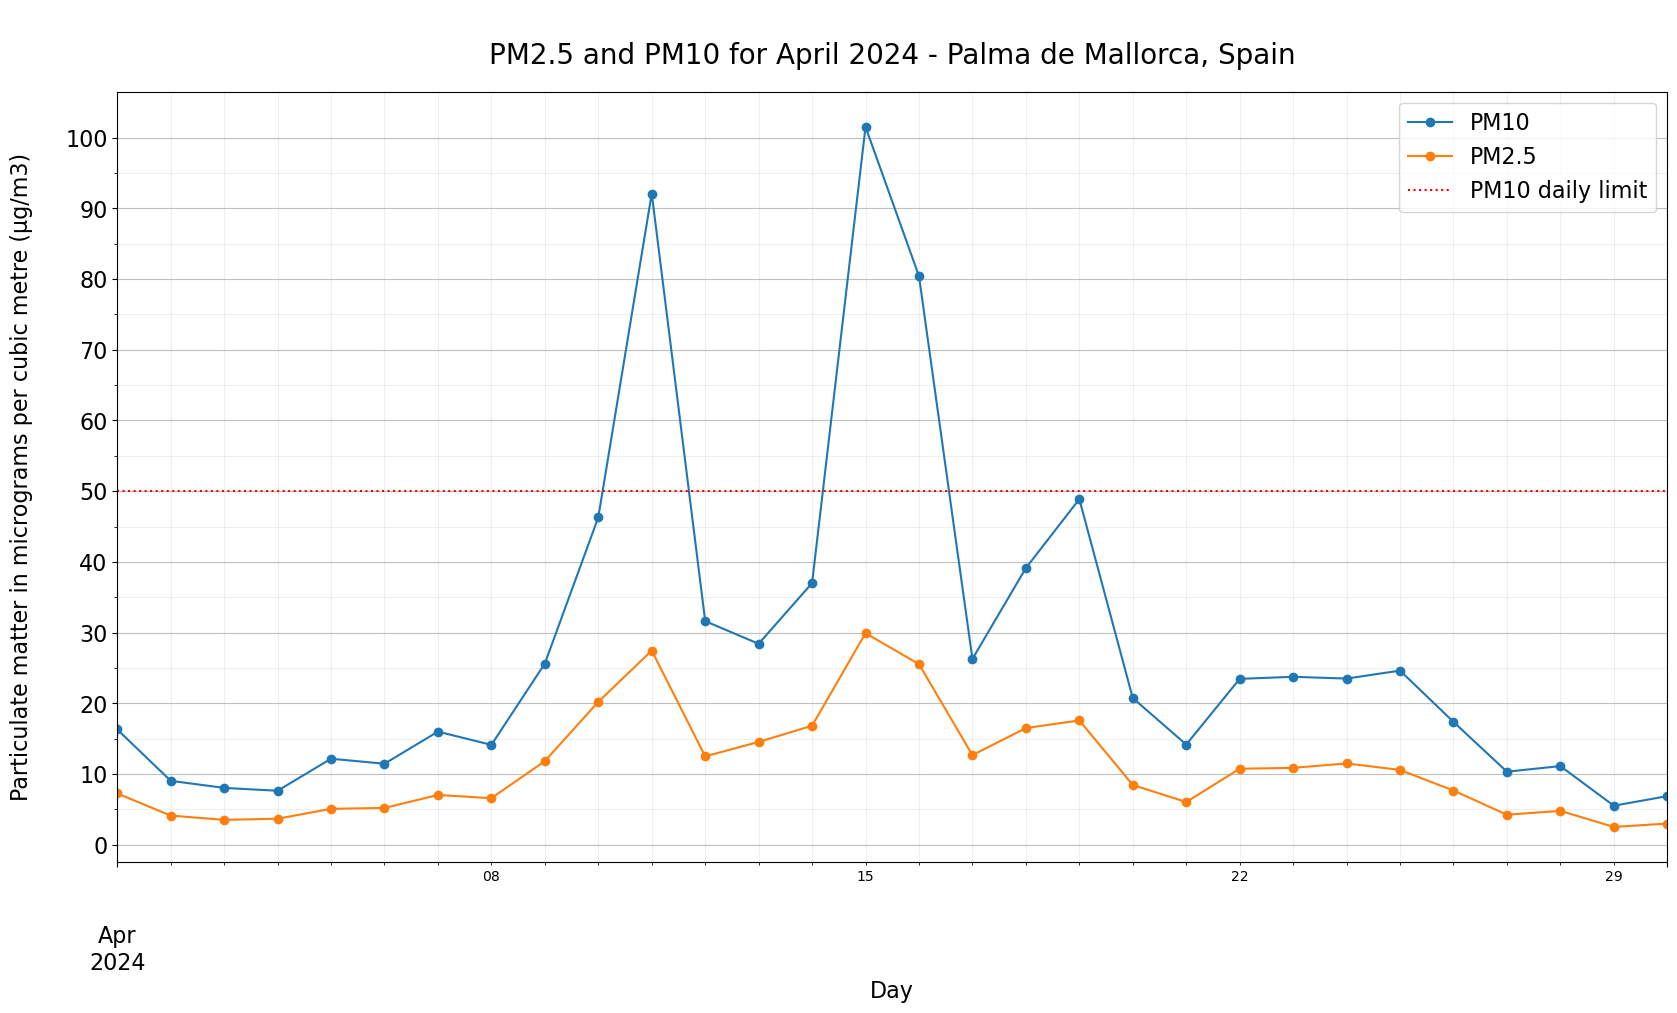

In [9]:
# Initiate a matplotlib figure
fig = plt.figure(figsize=(20,10))
ax = plt.axes()

# Select pandas dataframe columns and define a line plot for PM10 and PM2.5 each
pm10_Apr2024.filter(['PM10']).plot(ax=ax, style='o-', label='PM10')
pm2pt5_Apr2024.filter(['PM2.5']).plot(ax=ax, style='o-',label='PM2.5')
plt.axhline(y=50, color='r', linestyle='dotted', label='PM10 daily limit')

# Set title and axes lable information
plt.title('\nPM2.5 and PM10 for April 2024 - Palma de Mallorca, Spain', fontsize=20, pad=20)
plt.ylabel('Particulate matter in micrograms per cubic metre (µg/m3)\n', fontsize=16)

plt.xlabel('Day', fontsize=16)

# Format the axes ticks
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Set major ticks on the y-axis every 10, minor ticks every 5
major_ticks = np.arange(0, 101, 10)
minor_ticks = np.arange(0, 101, 5)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# Use different settings for the grids
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.8)

# Add additionally a legend and grid to the plot
plt.legend(fontsize=16,loc=0)
plt.show()

The plot shows you that the PM10 guidelines of 50µg/m3 set by the EU were exceeded multiple times between 10th and 17th April 2024.